# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Names

- Diana Chong
- Skylar Hom
- Tricia Pham
- Sofia Sanchez
- Emily Tam

# Group Members IDs

- A14627769
- A13022643
- A14107552
- A92130382
- A14873136

# Research Question

Are mobile iOS application prices correlated with user ratings?

## Background and Prior Work

Mobile technology has revolutionized how much of the world functions. It has the fastest growth of any technology in history (West, 2015). The speed of information that can be transferred across the globe has astronomically increased. Furthermore, the use of mobile technology has changed the relationship between businesses and consumers (West, 2015). The market for mobile devices, such as smartphones and tablets, has grown in tandem. A study conducted by the Pew Research Center concluded that around 90% of Americans currently have some form of mobile device (West, 2015). One primary component of mobile devices are the applications that are on the phone. They appear as bubble icons on the device’s display that are loaded by tapping on them. Application use is the primary way that users interact with their phones. A few applications are preloaded onto the phone. However, a significant number of applications must be downloaded from a host. For Apple phones, the Apple Store supplies nearly all of the applications that users can choose to download.

Upon the opening of the Apple Store, an “app economy” bloomed. The app economy is the development, marketing, and consumption of mobile applications (Dyer-Witheford, 2014). A significant portion of the software development field is dedicated towards the creation and maintenance of mobile applications (Dyer-Witheford, 2014). Due to the sheer scale of mobile applications, it is crucial for both companies and consumers to understand current trends in the app market. There is a huge spread of variability within the application market -- the type of application, such as social apps, games, or services; the price of the application; the company behind the development of the application; and the services that the application provides. Also, there are demographic trends for users of certain apps, such as age and gender, and statistical trends for products, like user ratings.  

On the company's end, the pricing of apps is mainly driven by a desired end result. Whether a group is striving for user numbers or aiming to make large profits determines if an application is free or paid. However, these desired goals are balanced by what customers are willing to pay for the product which is influenced by perceived quality and level of necessity. If customer reviews are in favor of the product and listed features align with user needs, people are more likely to see it as worthwhile. Since there are an abundant number of free iOS apps, choosing to not make an application free automatically raises the users’ expectations that what they are paying for will be worth the extra dollars that another product may not be asking for. It is up to a company to ensure their app fulfills expectations which goes on to affect if an individual is willing to pay for something they have not been able to even use yet.

User ratings are quite subjective and they encompass a variety of user profiles that conjunctively measure if the quality of a product is worth its monetary value. Ratings can be generally higher for paid apps as customers believe they are getting more and quality matches up to a price point. However, ratings can also be lower as high expectations can exceed what the app provides. General trends of iOS app ratings in relation to prices are largely influenced by the level of uncertainty users have when searching for a tool (Song, Kim, Jones, Baker, & Chin, 2014). This uncertainty, ranging from knowing exactly what is expected from the company’s products to needing an application as a first resource, influences expectations and demands which is reflected upon user app ratings. 




References (include links):
- 1) Dyer-Witheford, N. (2014). App Worker. In Miller P. & Matviyenko S. (Eds.), The Imaginary App (pp. 127-142). 
MIT Press. Retrieved from http://www.jstor.org/stable/j.ctt9qf91w.16
- 2) Song, J., Kim, J., Jones, D. R., Baker, J., Chin, W. W. (2014). Application discoverability and user satisfaction in mobile application stores: An environmental psychology perspective. Elsevier, 59, 37-51. Doi: https://doi.org/10.1016/j.dss.2013.10.004
- 3)West, D. (2015). MOBILE TECHNOLOGY. In Going Mobile: How Wireless Technology is Reshaping Our Lives 
(pp. 1-15). Brookings Institution Press. Retrieved from http://www.jstor.org/stable/10.7864/j.ctt7zsvqt.4


# Hypothesis


Null Hypothesis: There is no relationship between iOS app prices and user ratings.

Alternative Hypothesis: There is a change in user ratings when iOS app prices change. 

# Dataset(s)

Mobile App Statistics (Apple iOS app store) dataset
https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps#appleStore_description.csv
(7197 observations, 16 variables)

To analyze statistics about Apple iOS applications, we are utilizing the dataset “Mobile App Statistics (Apple iOS app store)” from Kaggle. The dataset provides data regarding variables such as ratings, prices and genres of 7197 different apps. For such variables, user rating is measured on a 0-5-point scale, prices are in US dollars, and some genres include Games, Health & Fitness and Utilities. 


(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Read in app data
df = pd.read_csv('AppleStore.csv')

In [3]:
#Check what data looks like
df.head()

#df_desc.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


# Data Cleaning

Describe your data cleaning steps here.

In [4]:
#Check columns
df.columns

Index(['Unnamed: 0', 'id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')

In [5]:
#Remove unneeded columns
df = df.drop(columns = ['Unnamed: 0', 'id', 'size_bytes', 'currency', 'rating_count_ver', 'user_rating_ver', 'ver',
                  'cont_rating', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'], axis = 1)

#Explanation:

#Unnamed: 0 is the dataset's original index that has not been removed. No data is stored here.
#id, currency: redundant
#size_bytes, rating_count_ver, user_rating_ver, ver, cont_rating, sup_devices.nu, ipadSC_urls, lang.num, vpp_lic: not used

In [6]:
#Rename columns
df.columns = ['app_name', 'app_store_price (USD)', 'rating_count', 'user_rating', 'category']
df.head()

,app_name,app_store_price (USD),rating_count,user_rating,category
0,PAC-MAN Premium,3.99,21292,4.0,Games
1,Evernote - stay organized,0.00,161065,4.0,Productivity
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",0.00,188583,3.5,Weather
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",0.00,262241,4.0,Shopping
4,Bible,0.00,985920,4.5,Reference


In [7]:
#Check to see if there are any rows with empty data cells
empty_rows = df[df.isnull().any(axis=1)]
len(empty_rows)

0

In [8]:
#Remove rows where the rating_count = 0
df = df[df['rating_count'] != 0]

In [48]:
#Create a new dataframe that removes all rows with a price greater than $9.99 (to reduce outliers) 
#to be used in a future data visualization

df3 = df[df['app_store_price (USD)'] < 9.99]

df3.head()

,app_name,app_store_price (USD),rating_count,user_rating,category
0,PAC-MAN Premium,3.99,21292,4.0,Games
1,Evernote - stay organized,0.00,161065,4.0,Productivity
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",0.00,188583,3.5,Weather
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",0.00,262241,4.0,Shopping
4,Bible,0.00,985920,4.5,Reference


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

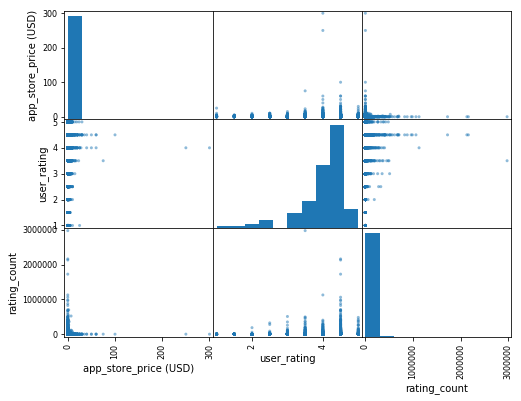

In [42]:
#Plot the data in a scatter matrix
fig = pd.plotting.scatter_matrix(df[['app_store_price (USD)', 'user_rating', 'rating_count']], figsize=(8,6))
#plt.title('Scatter Matrix of App Price & Rating Data') TITLE NOT WORKING, any advice?

plt.show()

#INTERPRETATION: Shows a general distribution of app store prices, user ratings, and rating counts. Due to the nature of the data
#(non parametric data, with user rating being an ordinal value), the scatter plots appear linear.

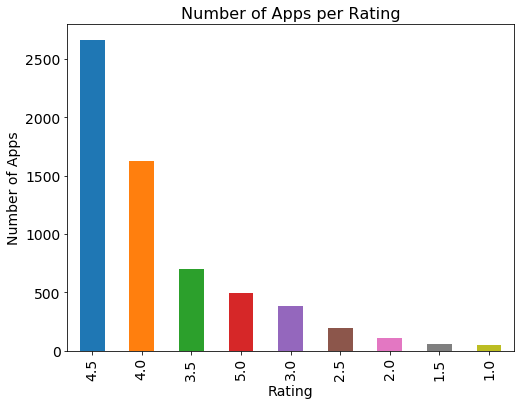

In [11]:
#Number of apps per rating
rating = df['user_rating'].value_counts()

plt.xlabel('Rating', fontsize = 14)
plt.ylabel('Number of Apps', fontsize = 14)
plt.title('Number of Apps per Rating', fontsize = 16)

rating.plot.bar(fontsize = 14, figsize=(8, 6))
plt.show()

#INTERPRETATION: There are considerably more high ratings than low ratings. A rating of 4.5 is significantly more common than
#other options. A 1.0 rating is very rare. The counts also mostly follow a linear distrubtion: the most common rating is a 4.5,
#and the values decrement in order of rating. The exception is a 5.0 rating, which is the 4th most common rating.

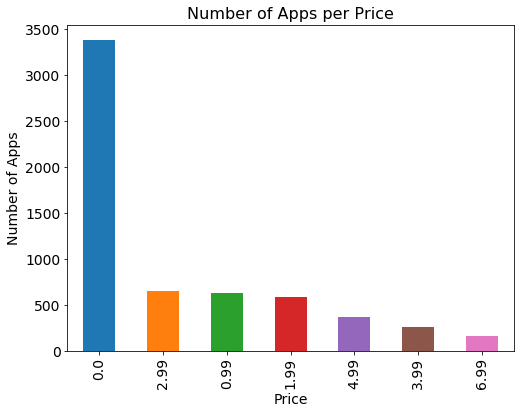

In [44]:
#Number of apps per price
price = df['app_store_price (USD)'].value_counts()

#Specifies number of apps per price to only include unique counts greater than 100 for a particular price.
#This helps better visualize the distribution, as there are many prices that have an insignificant number of apps priced
#at that value (a count of 1 or 2 was common, so those were deleted to better show distribution).
price = (price[price>=100])

plt.xlabel('Price', fontsize = 14)
plt.ylabel('Number of Apps', fontsize = 14)
plt.title('Number of Apps per Price', fontsize = 16)

price.plot.bar(fontsize = 14, figsize=(8, 6))
plt.show()

#INTERPRETATION: There are considerably more apps that are free than at any other price point. Following the free apps,
#the $2.99, $0.99, and $1.99 prices are the most popular. However, they are considerably less common than free apps. In our dataset,
#there are 3383 apps that are free. The next most common price, $2.99, has only 650 unique value counts.

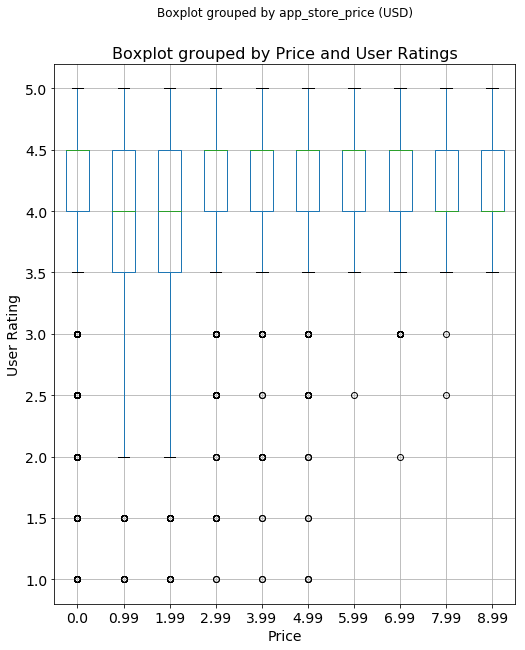

In [47]:
#Boxplot that groups app store price by user ratings to understand the trend of app store ratings for each price
df3.boxplot(column=['user_rating'], by=['app_store_price (USD)'], fontsize = 14, figsize=(8,10))

plt.xlabel('Price', fontsize = 14)
plt.ylabel('User Rating', fontsize = 14)
plt.title('Boxplot grouped by Price and User Ratings', fontsize = 16)
plt.show()

#INTERPRETATION: The boxplot shows the average user rating by prices up to $10. Prices up to $10 were chosen as to better see
#the boxes. Due to the nature of our data (non-parametric ordinal data), the boxes align exactly at rating data points.
#This results in the grid-like boxplot shown below. The range of user ratings for each price all lie within the 4.0-4.5 range,
#with the 1st and 3rd quartiles all being within this range. The exception is with apps that are $0.99 and $1.99,
#which have a Q1 of 3.5.

# Stats Tests that aren't working

In [ ]:
# See relationship between app price and user rating
#df['app_store_price (USD)', 'user_rating'].groupby(['user_rating']).describe()

In [ ]:
# only view these two variables
#df[['app_store_price (USD)', 'user_rating']].corr()

In [ ]:
#df2 = df.groupby('user_rating').mean()
#df2

In [ ]:
#plt.bar(df2.index, df2['app_store_price (USD)'], align='edge', width=0.5)
#plt.xlabel('Rating')
#plt.ylabel('Average Price')
#plt.title('Rating vs Price')
#plt.grid()
#plt.show()

In [ ]:
#1 degree linear model
#a1,b1 = np.polyfit(df2.index, df2['app_store_price (USD)'], 1)
#a1, b1

In [ ]:
#plt.scatter(df2.index, df2['app_store_price (USD)'], label='Data')

#xs = np.arange(df2.index.min(), df2.index.max())
#ys = 0.1139 * xs + 1.2246
#plt.plot(xs, ys, '--k', linewidth=4, label='Model')

#plt.xlabel('Rating')
#plt.ylabel('Average Price')
#plt.title('Rating vs Price')
#plt.legend()
#plt.show()

In [ ]:
# Set up a helper function for checking p-values against an alpha level, and printing result
alpha = 0.05

def check_test(p_val, alpha):
    if p_val > alpha:
        print('Same distribution (fail to reject H0)')
    else:
        print('Different distribution (reject H0)')

In [ ]:
# Using Whitney-Mann U test to check relation between distributions
#stat, p_val = stats.mannwhitneyu(df2.index, df2['app_store_price (USD)'])
#stat, p_val

In [ ]:
# Check p-value of Whitney-Mann U test
#check_test(p_val, alpha)

In [ ]:
#df['category'].value_counts()

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*